In [11]:
import pandas as pd
import numpy as np
# import pickle
import joblib
from pickle import dump
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('./Data/SumData.csv')
y = df['y_value']
X = df.loc[:, df.columns != 'y_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

cols = X_train.columns
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train.values)
# new data frame with the new scaled data. 
X_train = pd.DataFrame(X_train, columns = cols)
X_test = min_max_scaler.transform(X_test.values)
X_test = pd.DataFrame(X_test, columns = cols)


X_train =  np.array(X_train)
X_train = X_train.reshape(-1,90,1)
X_test =  np.array(X_test)
X_test = X_test.reshape(-1,90,1)


In [2]:
# import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint,LearningRateScheduler
import tensorflow as tf

In [5]:
early_stopping= EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5) 
check_pointer = ModelCheckpoint(filepath = 'clf-resnet-checkpoint2.hdf5',verbose=1,save_best_only=True) 
reduce_lr = ReduceLROnPlateau(monitor='val_loss',mode='min',verbose=1,patience=5,min_delta = 0.0001,factor=0.2) 
callbacks = [check_pointer,early_stopping,reduce_lr]
def create_model():
    model = Sequential()
    model.add(GRU(128, input_shape = (90,1), return_sequences = True))
    model.add(Dropout(0.3))
    model.add(GRU(64,  return_sequences = True))
    model.add(Dropout(0.3))
    model.add(GRU(32, return_sequences = True))
    model.add(Dropout(0.3))
    model.add(GRU(16, return_sequences = False))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    # model.summary()

    model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
    
    return model

# model.fit(X_train, y_train,
#                     validation_data = (X_test,y_test),
#                     epochs = 10,
#                     batch_size = 40
#                     ,callbacks = [callbacks]
# #                      ,early_stopping
#          )

In [9]:
hist = create_model().fit(X_train, y_train,
                    validation_data = (X_test,y_test),
                    epochs = 20,
                    batch_size = 40
                    ,callbacks = [callbacks]
#                      ,early_stopping
         )

Epoch 1/20
2050/2050 [==============================] - ETA: 0s - loss: 0.1805 - accuracy: 0.9586
Epoch 00001: val_loss improved from inf to 0.17483, saving model to clf-resnet-checkpoint2.hdf5
2050/2050 [==============================] - 68s 26ms/step - loss: 0.1805 - accuracy: 0.9586 - val_loss: 0.1748 - val_accuracy: 0.9587 - lr: 0.0010
Epoch 2/20
2050/2050 [==============================] - ETA: 0s - loss: 0.1703 - accuracy: 0.9581
Epoch 00002: val_loss improved from 0.17483 to 0.14827, saving model to clf-resnet-checkpoint2.hdf5
2050/2050 [==============================] - 52s 25ms/step - loss: 0.1703 - accuracy: 0.9581 - val_loss: 0.1483 - val_accuracy: 0.9609 - lr: 0.0010
Epoch 3/20
2048/2050 [============================>.] - ETA: 0s - loss: 0.1316 - accuracy: 0.9586
Epoch 00003: val_loss improved from 0.14827 to 0.10207, saving model to clf-resnet-checkpoint2.hdf5
2050/2050 [==============================] - 52s 25ms/step - loss: 0.1316 - accuracy: 0.9586 - val_loss: 0.1021 - 

<Figure size 1440x1440 with 0 Axes>

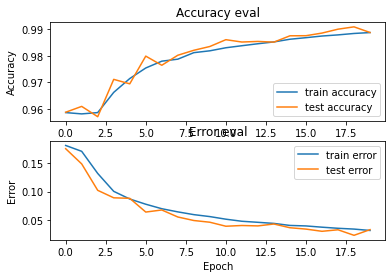

In [13]:
plt.figure(figsize=(20,20))
fig, axs = plt.subplots(2)

# accuracy 
axs[0].plot(hist.history["accuracy"], label="train accuracy")
axs[0].plot(hist.history["val_accuracy"], label="test accuracy")    
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy eval")
    
# Error 
axs[1].plot(hist.history["loss"], label="train error")
axs[1].plot(hist.history["val_loss"], label="test error")    
axs[1].set_ylabel("Error")
axs[1].set_xlabel("Epoch")
axs[1].legend(loc="upper right")
axs[1].set_title("Error eval")
    
plt.show()

In [5]:
model = create_model()
model.load_weights('clf-resnet-checkpoint.hdf5')

In [8]:
# joblib.dump(model, './gru_model.pkl')
model.save('gru_model.h5')

In [6]:
a = model.predict(X_test)
a

array([[0.00010637],
       [0.00011633],
       [0.00763271],
       ...,
       [0.00011924],
       [0.00019007],
       [0.00014204]], dtype=float32)

In [ ]:
list(map(astype()))

In [41]:
model.evaluate(X_test, y_test)

854/854 [==============================] - 7s 6ms/step - loss: 0.0242 - accuracy: 0.9914


[0.024165157228708267, 0.991363525390625]